In [23]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from joblib import load
from tensorflow import keras
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import classification_report, matthews_corrcoef,confusion_matrix, ConfusionMatrixDisplay, auc, roc_auc_score, roc_curve, RocCurveDisplay

## Logistic Regression

In [24]:
model = load("../models/logreg.joblib")
test_data = load("../data/test data/logreg_test_data.joblib")

In [25]:
label_predictions = model.predict(test_data["features"])

Classification report

In [26]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

         0.0       0.57      0.46      0.51      2820
         1.0       0.62      0.71      0.66      3483

    accuracy                           0.60      6303
   macro avg       0.59      0.59      0.59      6303
weighted avg       0.60      0.60      0.59      6303



Matthews correlation coeficient

In [27]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.1791040016268921

Confusion matrix

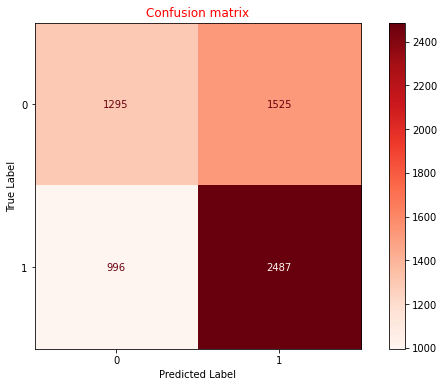

In [28]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

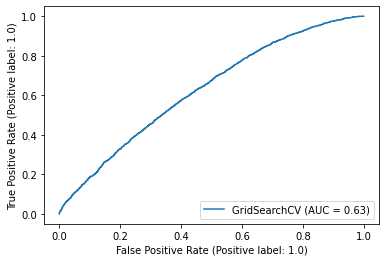

In [29]:
RocCurveDisplay.from_estimator(model, test_data["features"], test_data["labels"]);

## Support Vector Machine

In [30]:
model = load("../models/svm.joblib")
test_data = load("../data/test data/svm_test_data.joblib")

In [31]:
label_predictions = model.predict(test_data["features"])

Classification report

In [32]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

         0.0       0.61      0.39      0.47      2820
         1.0       0.62      0.80      0.70      3483

    accuracy                           0.61      6303
   macro avg       0.61      0.59      0.58      6303
weighted avg       0.61      0.61      0.60      6303



Matthews correlation coeficient

In [33]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.2045973076471845

Confusion matrix

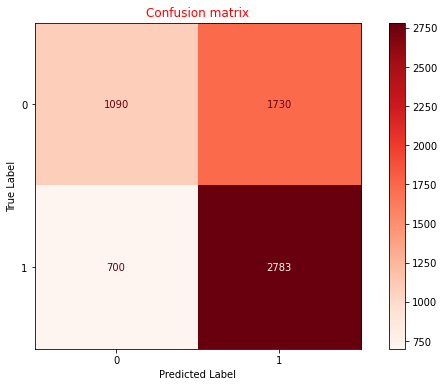

In [34]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

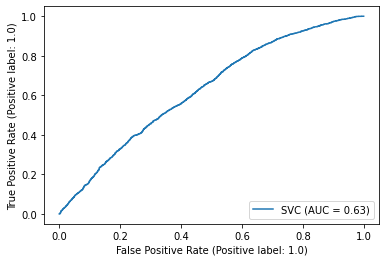

In [35]:
RocCurveDisplay.from_estimator(model, test_data["features"], test_data["labels"]);

## Feedforward Neural Network with ReLu Activation

In [36]:
model = keras.models.load_model("../models/NNRelu")
test_data = load("../data/test data/nnrelu_test_data.joblib")

In [37]:
label_predictions = model.predict(test_data["features"])
label_predictions[label_predictions < 0.5] = 0
label_predictions[label_predictions >= 0.5] = 1

197/197 [==============================] - 1s 2ms/step


Classification report

In [38]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      2868
         1.0       0.54      1.00      0.71      3435

    accuracy                           0.54      6303
   macro avg       0.27      0.50      0.35      6303
weighted avg       0.30      0.54      0.38      6303



Matthews correlation coeficient

In [39]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.0

Confusion matrix

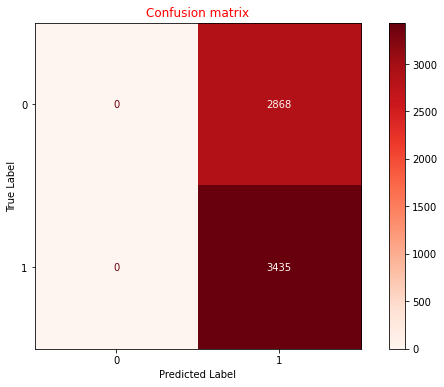

In [40]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

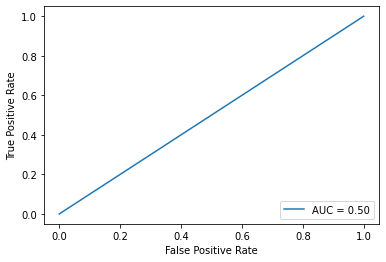

In [41]:
fpr, tpr, tresholds = roc_curve(test_data["labels"], label_predictions)
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_score(test_data["labels"], label_predictions))
disp.plot();

## Feedforward Neural Network with Sigmoid Activation

In [42]:
model = keras.models.load_model("../models/NNSigmoid")
test_data = load("../data/test data/nnsigmoid_test_data.joblib")

In [43]:
label_predictions = model.predict(test_data["features"])
label_predictions[label_predictions < 0.5] = 0
label_predictions[label_predictions >= 0.5] = 1

197/197 [==============================] - 0s 2ms/step


Classification report

In [44]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

         0.0       0.67      0.23      0.34      2879
         1.0       0.58      0.91      0.71      3424

    accuracy                           0.59      6303
   macro avg       0.62      0.57      0.52      6303
weighted avg       0.62      0.59      0.54      6303



Matthews correlation coeficient

In [45]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.17945062900279

Confusion matrix

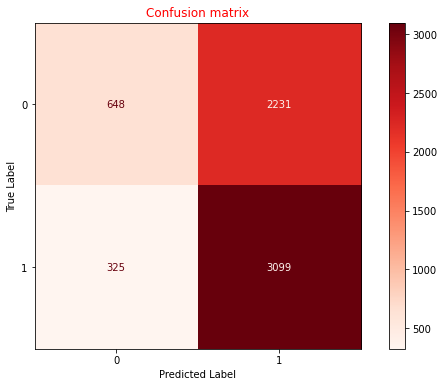

In [46]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

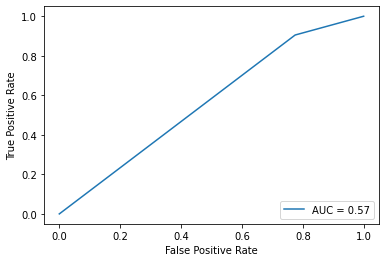

In [47]:
fpr, tpr, tresholds = roc_curve(test_data["labels"], label_predictions)
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_score(test_data["labels"], label_predictions))
disp.plot();

## Multinomial Naive Bayes

In [48]:
model = load("../models/multinomialnb.joblib")
test_data = load("../data/test data/multinomialnb_test_data.joblib")

In [49]:
label_predictions = model.predict(test_data["features"])

Classification report

In [50]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      2814
         1.0       0.55      1.00      0.71      3489

    accuracy                           0.55      6303
   macro avg       0.28      0.50      0.36      6303
weighted avg       0.31      0.55      0.39      6303



Matthews correlation coeficient

In [51]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.0

Confusion matrix

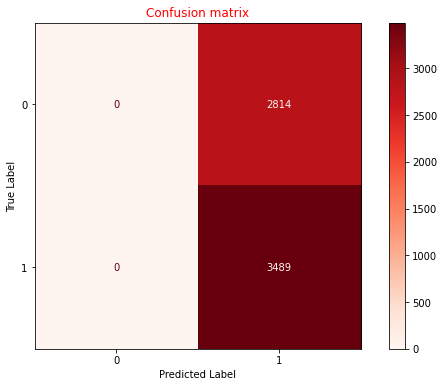

In [52]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

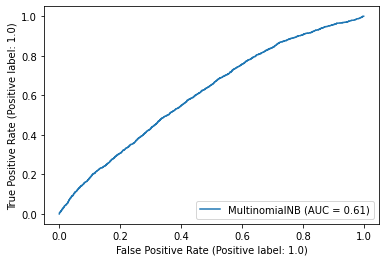

In [53]:
RocCurveDisplay.from_estimator(model, test_data["features"], test_data["labels"]);

## Random Forest

In [54]:
model = load("../models/randomforest.joblib")
test_data = load("../data/test data/randomforest_test_data.joblib")

In [55]:
label_predictions = model.predict(test_data["features"])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


Classification report

In [56]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

           0       0.59      0.43      0.50      2822
           1       0.62      0.76      0.68      3481

    accuracy                           0.61      6303
   macro avg       0.61      0.59      0.59      6303
weighted avg       0.61      0.61      0.60      6303



Matthews correlation coeficient

In [57]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.1994005797607882

Confusion matrix

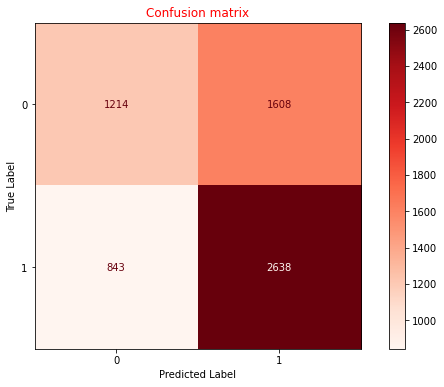

In [58]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


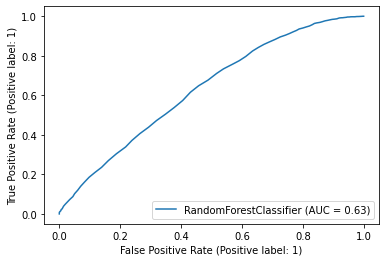

In [59]:
RocCurveDisplay.from_estimator(model, test_data["features"], test_data["labels"]);

## XGBoost

In [60]:
model = load("../models/xgboost.joblib")
test_data = load("../data/test data/xgboost_test_data.joblib")

In [61]:
label_predictions = model.predict(test_data["features"])

Classification report

In [62]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

           0       0.67      0.26      0.37      2862
           1       0.59      0.89      0.71      3441

    accuracy                           0.61      6303
   macro avg       0.63      0.58      0.54      6303
weighted avg       0.63      0.61      0.56      6303



Matthews correlation coeficient

In [63]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.19844819845688924

Confusion matrix

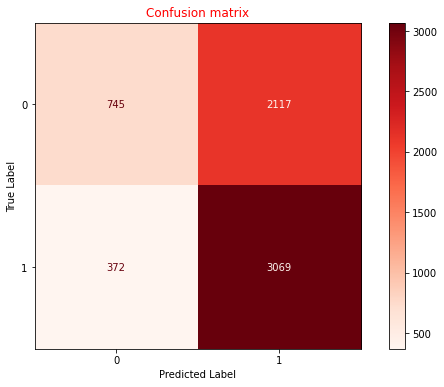

In [64]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

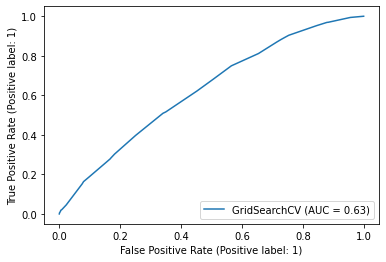

In [65]:
RocCurveDisplay.from_estimator(model, test_data["features"], test_data["labels"]);